In [1]:
%cd "D:\\Projects\\General-Churn-Prediction"

D:\Projects\General-Churn-Prediction


In [2]:
pwd

'D:\\Projects\\General-Churn-Prediction'

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

In [4]:
#Reading the dataset
churn_data = pd.read_csv('Dataset\\churn-prediction\\dataset.csv')
#train_data = pd.read_csv('Dataset\\churn-prediction\\dataset.csv')
from sklearn.model_selection import train_test_split
train_data, validation_data = train_test_split(churn_data, test_size = 0.2, stratify=churn_data['Churn'],shuffle=True)
validation_data.to_csv('Dataset\\churn-prediction\\validation.csv', index = False)

In [5]:
df = train_data.copy()
df.drop(columns=['customerID','TotalCharges'],inplace=True)

In [6]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
1026,Male,1,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.60,Yes
5216,Female,0,Yes,No,48,No,No phone service,DSL,No,Yes,Yes,No,No,No,One year,No,Mailed check,34.70,Yes
664,Female,0,Yes,Yes,57,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.50,No
3449,Female,0,Yes,Yes,52,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),95.70,No
6778,Female,0,No,Yes,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,Yes
3897,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,115.50,No
6409,Male,0,Yes,Yes,43,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.20,No
3317,Male,0,Yes,No,63,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Credit card (automatic),70.80,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 1026 to 5568
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null   object 
 1

In [8]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

## No null values..pretty good dataset

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.158324,32.335641,64.736173
std,0.365077,24.543322,29.990155
min,0.000000,0.000000,18.400000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.750000
max,1.000000,72.000000,118.750000


<Axes: xlabel='tenure', ylabel='Count'>

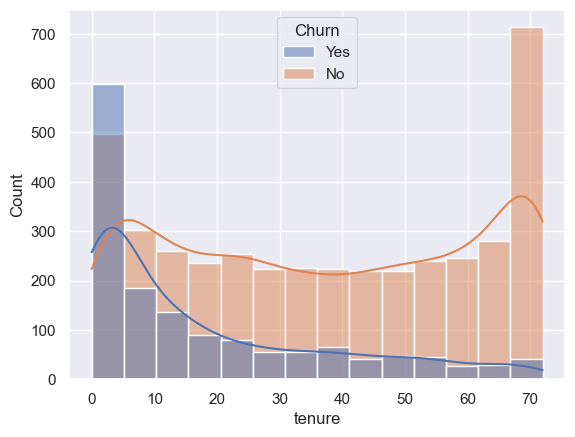

In [11]:
sns.histplot(x=df['tenure'],color='orange',kde=True,hue = df['Churn'])

### Insight : Most of the customers left in the first 5 months of tenure

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

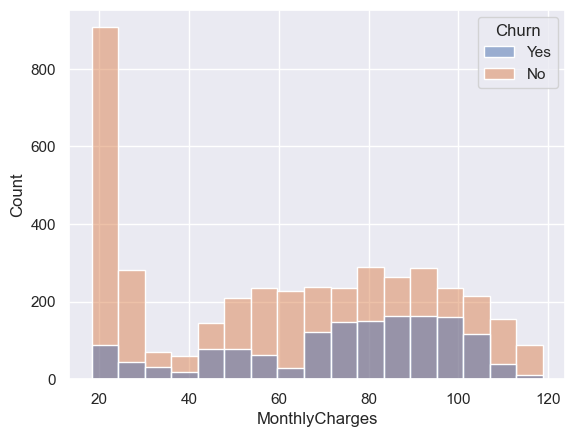

In [13]:
sns.histplot(x=df['MonthlyCharges'],hue = df['Churn'])

#### Insight : Customers whose montly plan is very cheap(<40) or very high(>110) are less linkely to churn

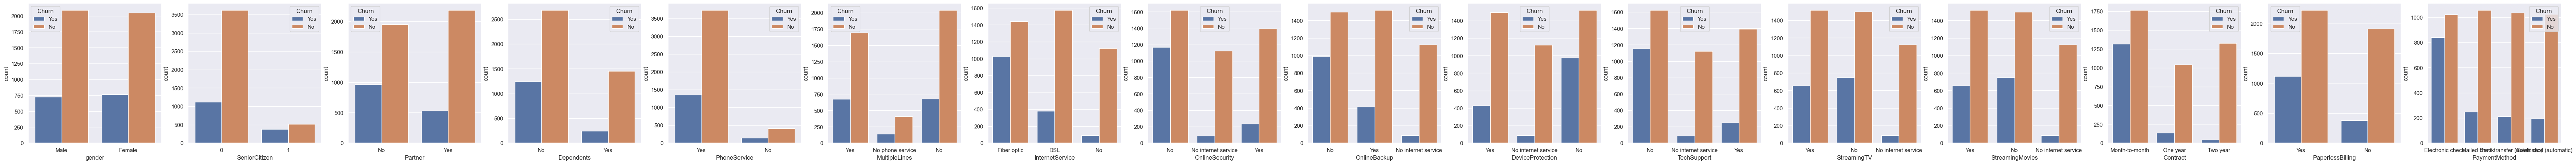

In [15]:
cols = list(df.columns)
cols_to_remove = ['tenure', 'MonthlyCharges', 'Churn']

for x in cols_to_remove:
    cols.remove(x)
plt.figure(figsize=(90,5))
for x in cols:
    plt.subplot(1, len(cols), cols.index(x) + 1)
    sns.countplot(x=x, data=df, hue='Churn')


<Axes: xlabel='TechSupport', ylabel='count'>

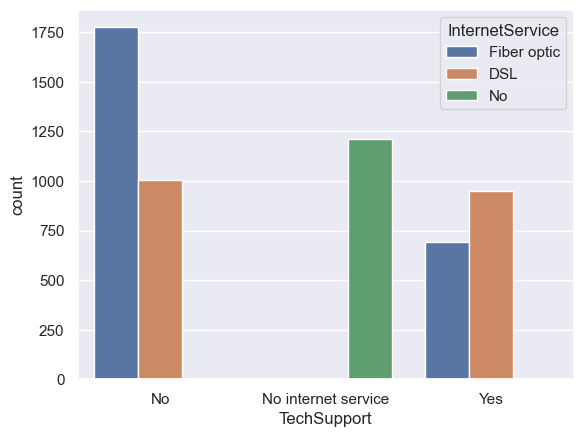

In [16]:
sns.countplot(x = 'TechSupport',data=df,hue='InternetService')

### Insights from the graphs:
1. Senior citizens are most likely to drop
2. Its been observed that most of the customers receiving internet service through fiber optic are prone to dropout
3. Lack of tehcnical support is a major concern.Most of the customers with no proper tehnical support dropped the telecom service.
   -- Very poor technical support for DSL cable
4. It is more likely for a month-to-month contract customers to drop the service
5. Customers are disappointed with online security and backup issues.

In [18]:
df2 = df[df['tenure']==0]
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,No
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,No
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,No


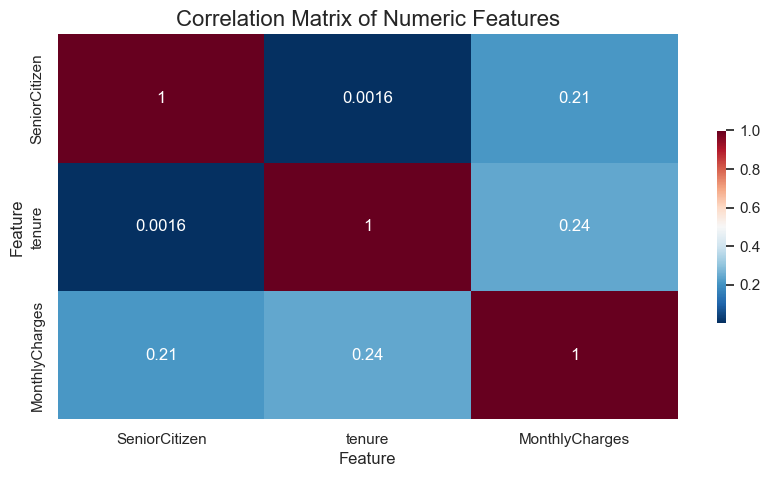

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' contains numeric columns relevant for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 5))
corr_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', cbar_kws={"shrink": 0.5})

# Add a title and labels
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

### It can be understood that the tenure of customer doesnt depend upon the type of citizen

## Preprocessing the data

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df[cols] = df[cols].apply(le.fit_transform)

In [24]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
1026,1,1,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,100.60,Yes
5216,0,0,1,0,48,0,1,0,0,2,2,0,0,0,1,0,3,34.70,Yes
664,0,0,1,1,57,1,0,2,1,1,1,1,1,1,2,0,0,19.50,No
3449,0,0,1,1,52,1,2,1,0,2,2,0,2,0,1,1,1,95.70,No
6778,0,0,0,1,72,1,0,2,1,1,1,1,1,1,2,1,3,19.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,24.80,Yes
3897,0,0,1,1,72,1,2,1,2,2,2,2,2,2,2,1,2,115.50,No
6409,1,0,1,1,43,1,0,2,1,1,1,1,1,1,1,1,3,19.20,No
3317,1,0,1,0,63,1,0,0,2,2,0,2,2,0,1,0,1,70.80,No


In [25]:
# Seperating independent and dependent variables
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [26]:
y = le.fit_transform(y)

In [27]:
df.Churn.value_counts()

Churn
No     4139
Yes    1495
Name: count, dtype: int64

#### The distribution of classes in dataset is not uniform. Thus, there is a high chance of poor performance of the model.To prevent this, an oversampling technique- SMOTE is used to balance the dataset

In [28]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto')
X,y = oversampler.fit_resample(X, y)
from collections import Counter
print(Counter(y))

Counter({1: 4139, 0: 4139})


## Training with various models

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,confusion_matrix
dt_classifier = DecisionTreeClassifier(criterion = 'entropy',random_state=101,)
dt_classifier.fit(X_train,y_train)
y_pred = dt_classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       834
           1       0.84      0.95      0.89       822

    accuracy                           0.89      1656
   macro avg       0.89      0.89      0.89      1656
weighted avg       0.89      0.89      0.89      1656



In [32]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)
y_pred = nb_classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       834
           1       0.74      0.79      0.76       822

    accuracy                           0.76      1656
   macro avg       0.76      0.76      0.76      1656
weighted avg       0.76      0.76      0.76      1656



In [34]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(X_train, y_train)
y_pred = log_classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       834
           1       0.75      0.81      0.78       822

    accuracy                           0.77      1656
   macro avg       0.77      0.77      0.77      1656
weighted avg       0.77      0.77      0.77      1656



C:\Users\Nagasai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77       834
           1       0.74      0.89      0.81       822

    accuracy                           0.79      1656
   macro avg       0.80      0.79      0.79      1656
weighted avg       0.80      0.79      0.79      1656



In [35]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf', random_state = 0)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       834
           1       0.73      0.78      0.76       822

    accuracy                           0.75      1656
   macro avg       0.75      0.75      0.75      1656
weighted avg       0.75      0.75      0.75      1656



from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test,y_pred))

## Training with neural network -- another approach

In [37]:
import tensorflow as tf
ann = tf.keras.Sequential()
ann.add(tf.keras.layers.Dense(units = 256,activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 128,activation = 'relu'))
#ann.add(tf.keras.layers.Dense(units = 64,activation = 'relu'))
#ann.add(tf.keras.layers.Dense(units = 32,activation = 'tanh'))
#ann.add(tf.keras.layers.Dense(units = 16,activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 8,activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1,activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy','precision','recall'])
ann.fit(X_train,y_train,validation_data=(X_test,y_test), batch_size = 32, epochs = 100)

Epoch 1/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6632 - loss: 0.5761 - precision: 0.6769 - recall: 0.6236 - val_accuracy: 0.7548 - val_loss: 0.5230 - val_precision: 0.7905 - val_recall: 0.6886
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7342 - loss: 0.5291 - precision: 0.7566 - recall: 0.6937 - val_accuracy: 0.7609 - val_loss: 0.5217 - val_precision: 0.7088 - val_recall: 0.8796
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7207 - loss: 0.5271 - precision: 0.7369 - recall: 0.6870 - val_accuracy: 0.7609 - val_loss: 0.4813 - val_precision: 0.7717 - val_recall: 0.7360
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7514 - loss: 0.5172 - precision: 0.7614 - recall: 0.7318 - val_accuracy: 0.7675 - val_loss: 0.5023 - val_precision: 0.7183 - val_recall: 0.8747
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7522 - loss: 0.5019 - precision: 0.7479 - recall: 0.7448 - val_accuracy: 0.7687 - val_los

In [38]:
y_ped = ann.predict(X_test)
print(confusion_matrix(y_test,y_pred))

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[701 133]
 [ 44 778]]


In [39]:
print(accuracy_score(y_test,y_pred))

0.8931159420289855


## Best suited Models are:
1. Decision Tree Classifier
2. RandomForest Classifier
3. Artificial Neural Network

Decision tree is more suited among the three since it is better interpretebale for the customer churn dataset.